In [29]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [30]:
df = pd.read_csv('../data/Fertilizer.csv')

In [31]:
df.head()

,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,37.0,0.0,0.0,Urea
1,12.0,0.0,36.0,DAP
2,7.0,9.0,30.0,Fourteen-Thirty Five-Fourteen
3,22.0,0.0,20.0,Twenty Eight-Twenty Eight
4,35.0,0.0,0.0,Urea


In [32]:
df.describe()

,Nitrogen,Potassium,Phosphorous
count,5000.000000,5000.000000,5000.000000
mean,18.921852,3.380107,18.591120
std,11.412663,5.755800,13.287137
min,4.000000,0.000000,0.000000
25%,10.839149,0.000000,10.707587
50%,12.935626,0.000000,18.569006
75%,23.056031,8.287160,29.633312
max,42.000000,19.000000,42.000000


In [33]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', 'Fourteen-Thirty Five-Fourteen',
       'Twenty Eight-Twenty Eight', 'Seventeen-Seventeen-Seventeen',
       'Twenty-Twenty', 'Ten-Twenty Six-Twenty Six'], dtype=object)

In [34]:
# Basic information about the dataset
print(df.info())

# Statistical summary of the dataset
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Nitrogen         5000 non-null   float64
 1   Potassium        5000 non-null   float64
 2   Phosphorous      5000 non-null   float64
 3   Fertilizer Name  5000 non-null   object 
dtypes: float64(3), object(1)
memory usage: 156.4+ KB
None
          Nitrogen    Potassium  Phosphorous
count  5000.000000  5000.000000  5000.000000
mean     18.921852     3.380107    18.591120
std      11.412663     5.755800    13.287137
min       4.000000     0.000000     0.000000
25%      10.839149     0.000000    10.707587
50%      12.935626     0.000000    18.569006
75%      23.056031     8.287160    29.633312
max      42.000000    19.000000    42.000000


<Axes: xlabel='Fertilizer Name', ylabel='count'>

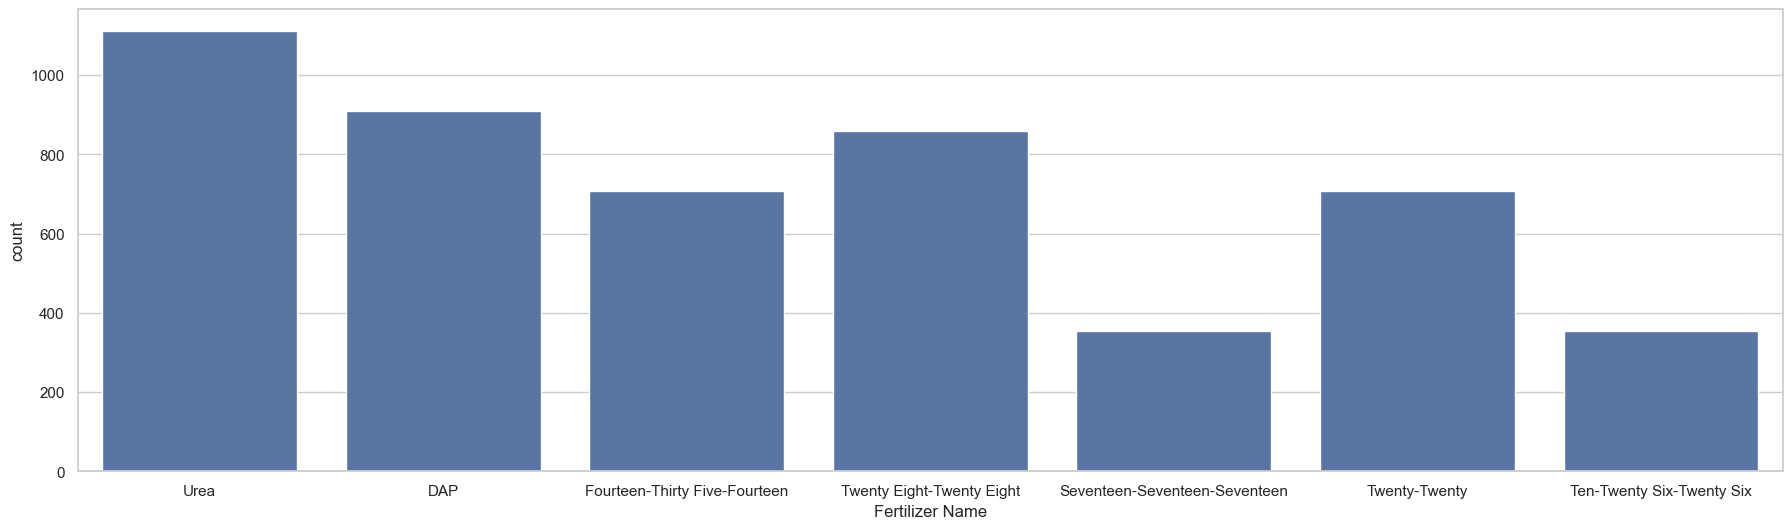

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(22,6))
sns.countplot(x='Fertilizer Name', data = df)

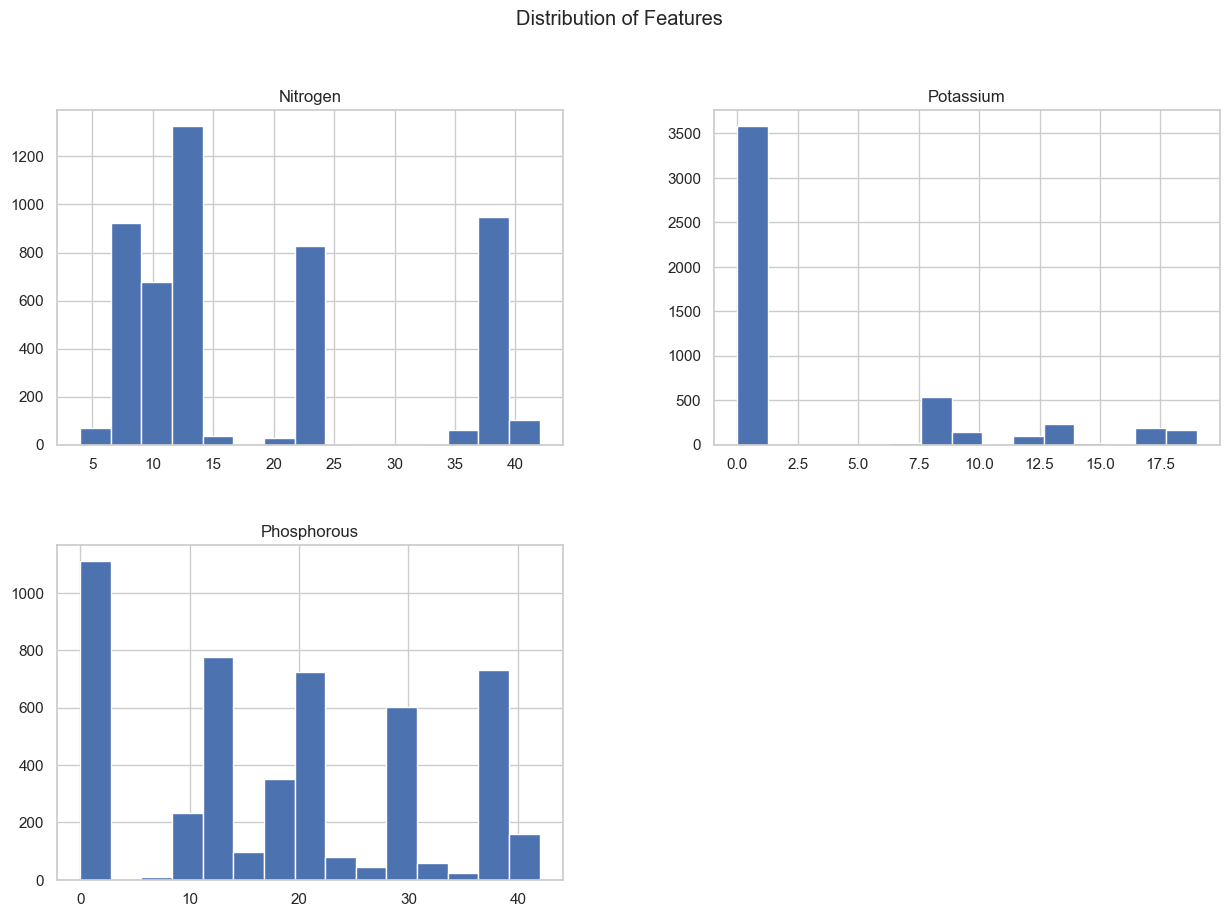

In [36]:
# Setting aesthetics for better readability of plots
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = [10, 8]

# Plotting histograms for each feature
df.hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribution of Features')
plt.show()


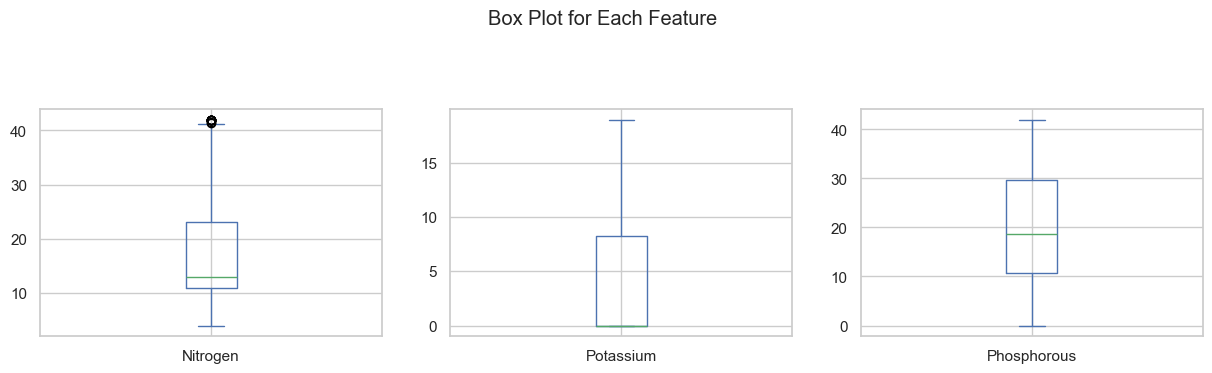

In [37]:
# Box plots for each feature
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15, 10))
plt.suptitle('Box Plot for Each Feature')
plt.show()


In [38]:
corr = df.drop(columns=['Fertilizer Name']).corr()
corr

,Nitrogen,Potassium,Phosphorous
Nitrogen,1.000000,-0.504769,-0.698588
Potassium,-0.504769,1.000000,0.093500
Phosphorous,-0.698588,0.093500,1.000000


<Axes: >

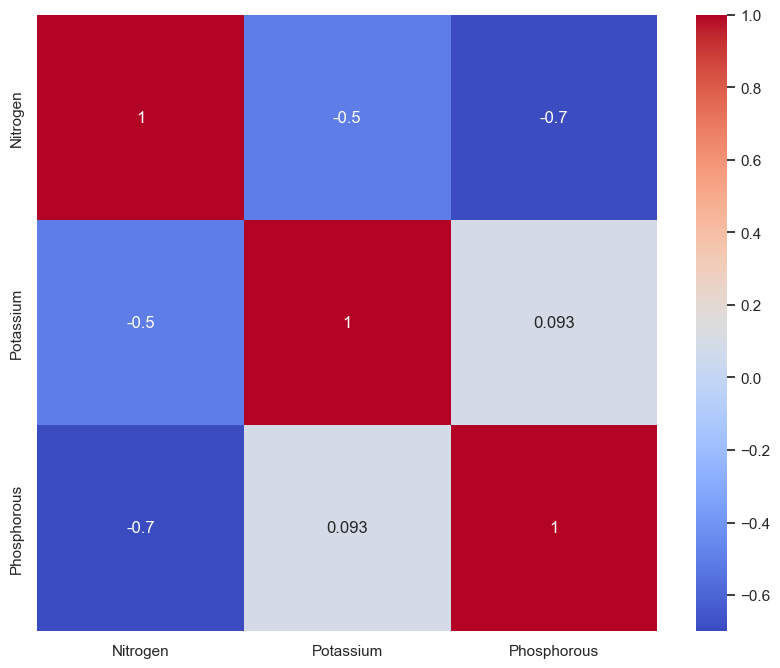

In [39]:
sns.heatmap(corr, annot = True, cbar = True, cmap = 'coolwarm')

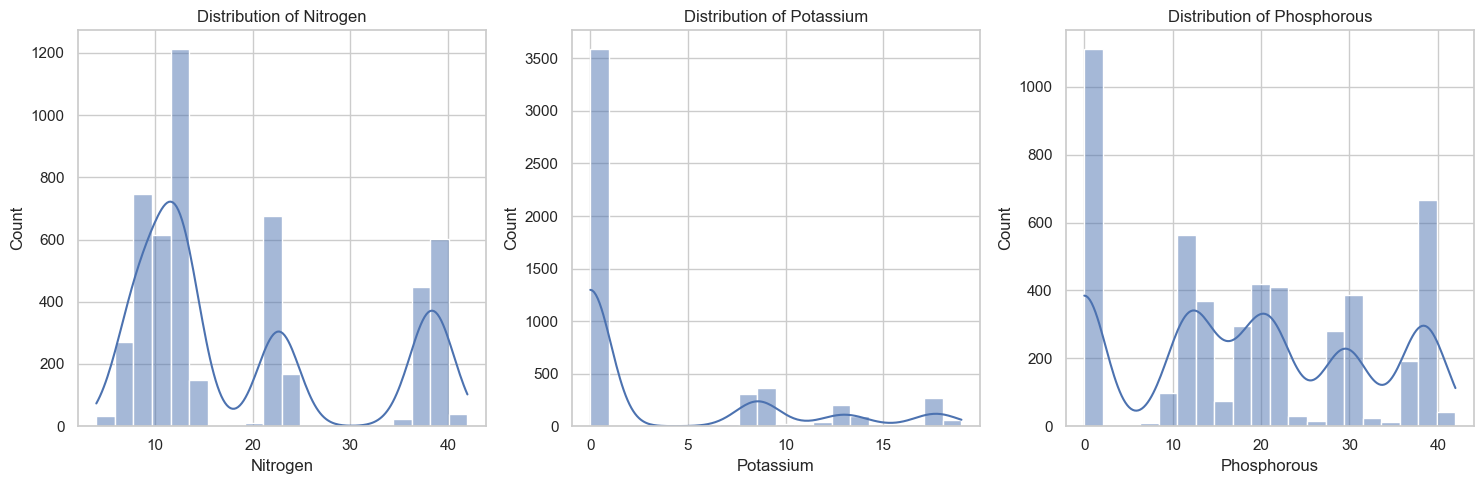

In [40]:
# Plotting the distribution graphs of the variables
plt.figure(figsize=(15, 5))

# Enumerating through each numeric column for distribution plot
for i, column in enumerate(['Nitrogen', 'Potassium', 'Phosphorous'], start=1):
    plt.subplot(1, 3, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

# Removing the non-numeric column for correlation analysis
numeric_data = df.drop('Fertilizer Name', axis=1)

In [41]:
X = df.drop(columns=['Fertilizer Name'])
y = df['Fertilizer Name']

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,shuffle=True,random_state=42)

In [43]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [44]:
X_train[0]

array([-0.57833314,  1.68909736, -0.35357573])

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion = 'gini', random_state=42)
classifier.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
y_pred = classifier.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[287   0   0   0   0   0   0]
 [  0 227   0   0   0   0   0]
 [  0   0  99   0   0   0   0]
 [  0   0   0 102   0   0   0]
 [  0   0   0   0 247   0   0]
 [  0   0   0   0   0 215   0]
 [  0   0   0   0   0   0 323]]


1.0

In [48]:
from sklearn.preprocessing import LabelEncoder
encode_ferti = LabelEncoder()
df['Fertilizer Name']=encode_ferti.fit_transform(df['Fertilizer Name'])
#creating the dataframe
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['original','Encoded'])
Fertilizer = Fertilizer.set_index('original')
Fertilizer

,Encoded
original,
DAP,0
Fourteen-Thirty Five-Fourteen,1
Seventeen-Seventeen-Seventeen,2
Ten-Twenty Six-Twenty Six,3
Twenty Eight-Twenty Eight,4
Twenty-Twenty,5
Urea,6


In [49]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['Fertilizer Name']),df['Fertilizer Name'],test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (4000, 3), y_train = (4000,), x_test = (1000, 3), y_test = (1000,)


In [50]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 1233 to 235
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     4000 non-null   float64
 1   Potassium    4000 non-null   float64
 2   Phosphorous  4000 non-null   float64
dtypes: float64(3)
memory usage: 125.0 KB


In [51]:
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
pred_rand = rand.predict(x_test)

In [53]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,6,7],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 3/3] END max_depth=5, min_samples_split=2, n_estimators=300;, score=0.998 total time=   0.5s
[CV 1/3] END max_depth=5, min_samples_split=2, n_estimators=300;, score=0.999 total time=   0.6s
[CV 2/3] END max_depth=5, min_samples_split=2, n_estimators=300;, score=1.000 total time=   0.6s
[CV 2/3] END max_depth=5, min_samples_split=2, n_estimators=400;, score=1.000 total time=   0.7s
[CV 1/3] END max_depth=5, min_samples_split=2, n_estimators=400;, score=0.999 total time=   0.8s
[CV 3/3] END max_depth=5, min_samples_split=2, n_estimators=400;, score=0.999 total time=   0.7s
[CV 1/3] END max_depth=5, min_samples_split=2, n_estimators=500;, score=0.999 total time=   0.9s
[CV 2/3] END max_depth=5, min_samples_split=2, n_estimators=500;, score=1.000 total time=   1.0s
[CV 1/3] END max_depth=5, min_samples_split=5, n_estimators=300;, score=0.999 total time=   0.5s
[CV 2/3] END max_depth=5, min_samples_split=5, n_estimators=300;, 

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute evaluation metrics
accuracy_rand = accuracy_score(y_test, pred_rand)
precision_rand = precision_score(y_test, pred_rand, average='weighted')
recall_rand = recall_score(y_test, pred_rand, average='weighted')
f1_rand = f1_score(y_test, pred_rand, average='weighted')

# Print evaluation metrics
print(f"Random Forest Classifier Metrics with GridSearchCV:")
print(f"Accuracy: {accuracy_rand}")
print(f"Precision: {precision_rand}")
print(f"Recall: {recall_rand}")
print(f"F1-score: {f1_rand}")

# Compute the confusion matrix
conf_matrix_rand = confusion_matrix(y_test, pred_rand)

Random Forest Classifier Metrics with GridSearchCV:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


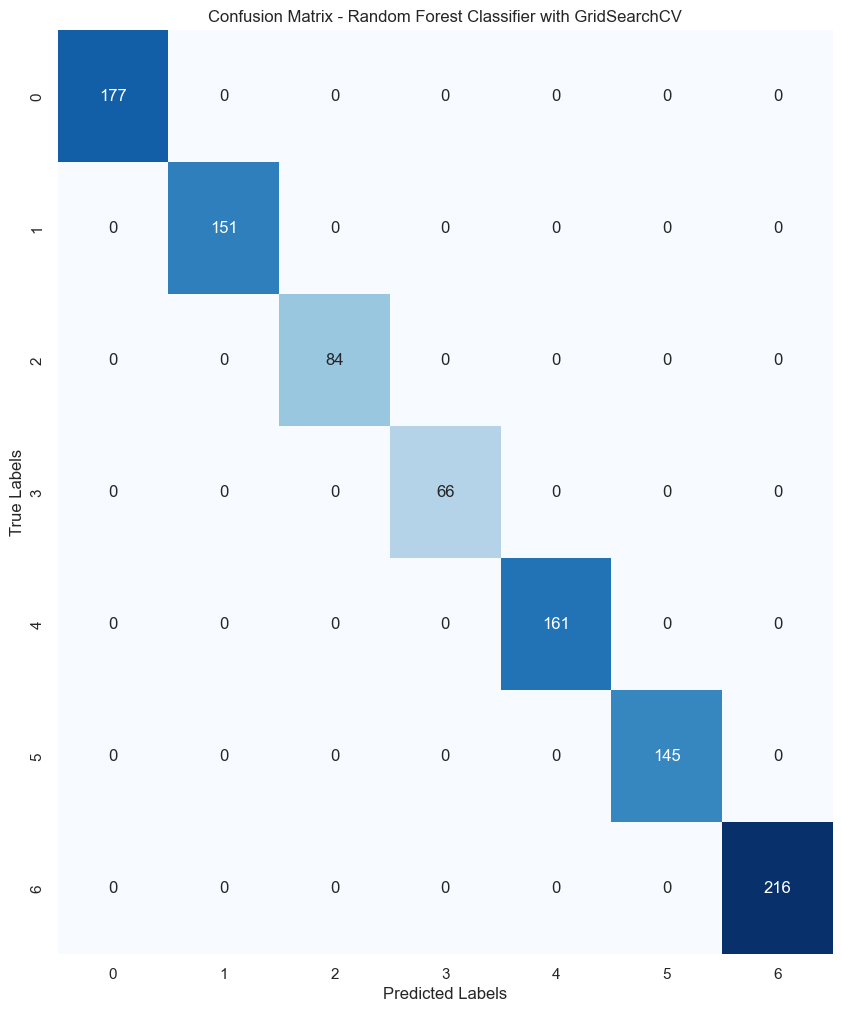

In [55]:
# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 12))
sns.heatmap(conf_matrix_rand, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest Classifier with GridSearchCV')
plt.show()

In [56]:
import pickle

# Save the best model (GridSearchCV has .best_estimator_)
best_fertilizer_model = grid_rand.best_estimator_

with open("../models/fertilizer_model.pkl", "wb") as f:
    pickle.dump((best_fertilizer_model, encode_ferti), f)

